## Implementing Linear Regression from scratch using Gradient Descent in TensorFlow

In [11]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [22]:
# Generating features
np.random.seed(100)
x = tf.constant(np.random.randint(100, size =(10000,4)), dtype = tf.float32)
x

<tf.Tensor: shape=(10000, 4), dtype=float32, numpy=
array([[ 8., 24., 67., 87.],
       [79., 48., 10., 94.],
       [52., 98., 53., 66.],
       ...,
       [81., 28., 52., 44.],
       [ 7.,  7., 10., 20.],
       [18., 42., 52.,  1.]], dtype=float32)>

In [23]:
# Generating lables with w and b.
# w1 = 1  w2 = 3   b = 5
w = [2, 3, -3, 9]
b = -500

# y = w1*x1 + w2*x2 + b 
m = tf.constant(np.asarray([w]), dtype = tf.float32)
b = tf.constant(b, dtype = tf.float32)
y = tf.squeeze(tf.matmul(m,x, transpose_b = True) + b)
y

<tf.Tensor: shape=(10000,), dtype=float32, numpy=array([ 170.,  618.,  333., ...,  -14., -315., -485.], dtype=float32)>

Text(0, 0.5, 'Y')

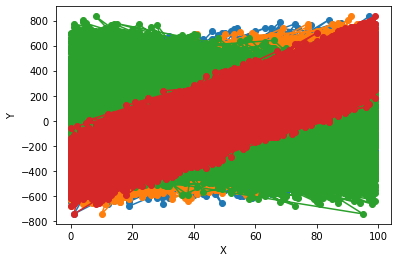

In [24]:
# visualizing the data for univariate
plt.plot(x, y, marker='o')
plt.xlabel("X")
plt.ylabel("Y")


In [25]:
# Computing rmse loss function
def compute_mse(y_label, y_pred):
    return tf.reduce_mean(((y_label - y_pred)**2))


In [26]:
# Computing gradients
def gradients_mse(X, Y, Y_PREDS):
    DW1 = tf.matmul(X, tf.reshape(Y-Y_PREDS, (X.shape[0],1)), transpose_a = True) * (-2/X.shape[0])
    DW0 = (-2 / X.shape[0]) * tf.reduce_sum(Y - Y_PREDS)
    return DW1, DW0
    

In [27]:
EPOCHS = 100
w_vector = np.random.uniform(-2,2, size =(x.shape[1],1))

w3 = tf.Variable(w_vector, dtype = tf.float32)
w4 = tf.Variable(0, dtype = tf.float32)

w1 = tf.Variable(w_vector, dtype = tf.float32)
w0 = tf.Variable(0, dtype = tf.float32)
lr = 1e-5
LOSS = []

for epoch in range(1,EPOCHS+1):
    with tf.GradientTape() as tape:
        y_pred = tf.squeeze(tf.matmul(w1,x, transpose_a = True, transpose_b = True) + w0)
        loss = compute_mse(y, y_pred)
    
    gradients = tape.gradient(loss, [w1, w0])
    w1.assign_sub(gradients[0] * lr)
    w0.assign_sub(gradients[1] * lr)
    
    
    
#     Computing with equations for mse loss function
    y_pred1 = tf.squeeze(tf.matmul(w3,x, transpose_a = True, transpose_b = True) + w4)
    dw3, dw4 = gradients_mse(x, y, y_pred1)
    w3.assign_sub(dw3 * lr)
    w4.assign_sub(dw4 * lr)
    LOSS.append(loss)
    
    
    
#     print("After Epoch: {} dw1: {} dw0: {}".format(epoch, gradients[0].numpy(), gradients[1].numpy()))
#     print("After Epoch: {} dw3: {} dw4: {}".format(epoch, dw3.numpy(), dw4.numpy()))
#     print()
#     print("After Epoch: {} dw1: {} dw0: {}".format(epoch, gradients[0].numpy() * lr, gradients[1].numpy() * lr))
#     print("After Epoch: {} dw3: {} dw4: {}".format(epoch, dw3.numpy() * lr, dw4.numpy() * lr))
#     print()
#     print("After Epoch: {} w1: {} w0: {}".format(epoch, w1.numpy(), w0.numpy()))
#     print("After Epoch: {} w3: {} w4: {}".format(epoch, w3.numpy(), w4.numpy()))
#     print('Loss Tensorflow = {} Loss Equation = {}'.format(loss, compute_mse(y, y_pred1)))
#     print('---------------------------------------------------------------\n')
    
    
    
print('Final Results')
print('================================')
print('w1 : {}'.format(w1.numpy()))
print('w0 : {}'.format(w0.numpy()))
print('w3 : {}'.format(w3.numpy()))
print('w4 : {}'.format(w4.numpy()))
print('Final Loss : {}'.format(LOSS[-1]))

    


    
    

    

    
    

Final Results
w1 : [[-0.01754967]
 [ 0.5529849 ]
 [-4.214487  ]
 [ 5.40132   ]]
w0 : -0.062325406819581985
w3 : [[-0.01754948]
 [ 0.55298513]
 [-4.214487  ]
 [ 5.4013195 ]]
w4 : -0.06232539936900139
Final Loss : 22111.6484375


In [28]:
# using keras to get same results
def create_model():
    model = tf.keras.Sequential()
    model.add(tf.keras.layers.Dense(units = 1,  name = 'd1', input_shape = (x.shape[1],)))
    
    model.compile(optimizer=tf.keras.optimizers.SGD(lr=1e-5),
                loss="mse")
    
    return model
model = create_model()

d1 = model.get_layer('d1')
d1_weights = [tf.constant(w_vector, dtype = tf.float32), tf.constant(np.array([0]), dtype = tf.float32)]
d1.set_weights(d1_weights)
d1.weights

model.fit(x, y, epochs = 100)


Epoch 1/100
313/313 [==============================] - 1s 4ms/step - loss: 27066.7324
Epoch 2/100
313/313 [==============================] - 1s 4ms/step - loss: 19537.7559
Epoch 3/100
313/313 [==============================] - 1s 4ms/step - loss: 19490.3047
Epoch 4/100
313/313 [==============================] - 1s 4ms/step - loss: 19474.4238
Epoch 5/100
313/313 [==============================] - 1s 4ms/step - loss: 19482.6367
Epoch 6/100
313/313 [==============================] - 1s 4ms/step - loss: 19463.4434
Epoch 7/100
313/313 [==============================] - 1s 4ms/step - loss: 19419.6660
Epoch 8/100
313/313 [==============================] - 1s 3ms/step - loss: 19392.7930
Epoch 9/100
313/313 [==============================] - 1s 3ms/step - loss: 19406.6797
Epoch 10/100
313/313 [==============================] - 1s 4ms/step - loss: 19346.1602
Epoch 11/100
313/313 [==============================] - 1s 3ms/step - loss: 19342.1016
Epoch 12/100
313/313 [==============================

313/313 [==============================] - 1s 4ms/step - loss: 17833.3496
Epoch 96/100
313/313 [==============================] - 1s 4ms/step - loss: 17799.0000
Epoch 97/100
313/313 [==============================] - 1s 4ms/step - loss: 17808.1094
Epoch 98/100
313/313 [==============================] - 1s 4ms/step - loss: 17772.1523
Epoch 99/100
313/313 [==============================] - 1s 4ms/step - loss: 17745.3301
Epoch 100/100
313/313 [==============================] - 1s 4ms/step - loss: 17737.4238


In [22]:
d1 = model.get_layer('d1')
d1.weights

[<tf.Variable 'd1_1/kernel:0' shape=(4, 1) dtype=float32, numpy=
 array([[-0.75543296],
        [ 0.5384736 ],
        [-6.0046735 ],
        [ 6.9203186 ]], dtype=float32)>,
 <tf.Variable 'd1_1/bias:0' shape=(1,) dtype=float32, numpy=array([-0.08318206], dtype=float32)>]

Text(0, 0.5, 'Loss')

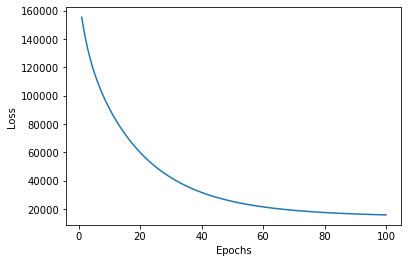

In [23]:
plt.plot(range(1,len(LOSS)+1), LOSS)
plt.xlabel('Epochs')
plt.ylabel('Loss')

In [24]:
def predict(x, w1, w0):
    return tf.squeeze(tf.matmul(w1,x, transpose_a = True, transpose_b = True) + w0)

predict(x,w1, w0)

    

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([ 206.55135,  556.5476 ,  151.89806, -104.64823, -216.65224,
       -459.36536, -197.55054,  640.5198 ,  288.4869 , -269.9884 ],
      dtype=float32)>